## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.678557 -0.801938 -1.244928 -0.493235 -0.428514 -0.075069
1  1.222849  0.588547 -0.988060  1.673194 -1.276213  1.361608
2  1.314129  0.203739  1.024428  1.415079 -1.351920  1.166429
3 -1.683452 -1.125577 -1.478563  1.643492 -0.201480  0.358219
4  1.401546  0.814139 -0.669837  0.320723  0.427531  0.739162


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9245111	total: 57ms	remaining: 56.9s
1:	learn: 0.9160172	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9062670	total: 57.9ms	remaining: 19.3s
3:	learn: 0.8965976	total: 58.4ms	remaining: 14.5s
4:	learn: 0.8873175	total: 58.9ms	remaining: 11.7s
5:	learn: 0.8784721	total: 59.4ms	remaining: 9.84s
6:	learn: 0.8694503	total: 59.9ms	remaining: 8.5s
7:	learn: 0.8608226	total: 60.4ms	remaining: 7.49s
8:	learn: 0.8525538	total: 60.9ms	remaining: 6.71s
9:	learn: 0.8441298	total: 61.5ms	remaining: 6.08s
10:	learn: 0.8354884	total: 62ms	remaining: 5.57s
11:	learn: 0.8276226	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8183074	total: 62.9ms	remaining: 4.77s
13:	learn: 0.8102977	total: 64ms	remaining: 4.51s
14:	learn: 0.8031953	total: 64.6ms	remaining: 4.24s
15:	learn: 0.7951291	total: 65.1ms	remaining: 4s
16:	learn: 0.7871002	total: 65.5ms	remaining: 3.79s
17:	learn: 0.7818072	total: 66ms	remaining: 3.6s
18:	learn: 0.7736807	total: 66.6ms	remaining: 3.44s
19:	l

104:	learn: 0.3749024	total: 108ms	remaining: 924ms
105:	learn: 0.3720868	total: 109ms	remaining: 920ms
106:	learn: 0.3687809	total: 109ms	remaining: 914ms
107:	learn: 0.3660118	total: 110ms	remaining: 909ms
108:	learn: 0.3634611	total: 110ms	remaining: 903ms
109:	learn: 0.3600656	total: 111ms	remaining: 897ms
110:	learn: 0.3576639	total: 111ms	remaining: 892ms
111:	learn: 0.3552671	total: 112ms	remaining: 888ms
112:	learn: 0.3530346	total: 113ms	remaining: 883ms
113:	learn: 0.3506029	total: 113ms	remaining: 878ms
114:	learn: 0.3486535	total: 114ms	remaining: 874ms
115:	learn: 0.3462211	total: 114ms	remaining: 869ms
116:	learn: 0.3439203	total: 115ms	remaining: 865ms
117:	learn: 0.3412919	total: 115ms	remaining: 860ms
118:	learn: 0.3392594	total: 115ms	remaining: 855ms
119:	learn: 0.3369655	total: 116ms	remaining: 851ms
120:	learn: 0.3346857	total: 116ms	remaining: 846ms
121:	learn: 0.3324677	total: 117ms	remaining: 842ms
122:	learn: 0.3305965	total: 117ms	remaining: 837ms
123:	learn: 

266:	learn: 0.1322694	total: 187ms	remaining: 513ms
267:	learn: 0.1315634	total: 187ms	remaining: 512ms
268:	learn: 0.1305271	total: 188ms	remaining: 510ms
269:	learn: 0.1297284	total: 188ms	remaining: 509ms
270:	learn: 0.1287307	total: 189ms	remaining: 508ms
271:	learn: 0.1281773	total: 189ms	remaining: 506ms
272:	learn: 0.1275250	total: 189ms	remaining: 505ms
273:	learn: 0.1267565	total: 190ms	remaining: 503ms
274:	learn: 0.1261188	total: 190ms	remaining: 502ms
275:	learn: 0.1256326	total: 191ms	remaining: 501ms
276:	learn: 0.1248816	total: 191ms	remaining: 499ms
277:	learn: 0.1243243	total: 192ms	remaining: 498ms
278:	learn: 0.1238539	total: 192ms	remaining: 497ms
279:	learn: 0.1233371	total: 193ms	remaining: 495ms
280:	learn: 0.1226203	total: 193ms	remaining: 494ms
281:	learn: 0.1217729	total: 194ms	remaining: 493ms
282:	learn: 0.1211207	total: 194ms	remaining: 492ms
283:	learn: 0.1204094	total: 195ms	remaining: 491ms
284:	learn: 0.1196047	total: 195ms	remaining: 490ms
285:	learn: 

493:	learn: 0.0463307	total: 291ms	remaining: 298ms
494:	learn: 0.0461554	total: 292ms	remaining: 298ms
495:	learn: 0.0460829	total: 292ms	remaining: 297ms
496:	learn: 0.0458873	total: 292ms	remaining: 296ms
497:	learn: 0.0456349	total: 293ms	remaining: 295ms
498:	learn: 0.0455645	total: 293ms	remaining: 295ms
499:	learn: 0.0453175	total: 294ms	remaining: 294ms
500:	learn: 0.0450862	total: 294ms	remaining: 293ms
501:	learn: 0.0449051	total: 295ms	remaining: 292ms
502:	learn: 0.0447277	total: 295ms	remaining: 292ms
503:	learn: 0.0444655	total: 296ms	remaining: 291ms
504:	learn: 0.0443973	total: 296ms	remaining: 290ms
505:	learn: 0.0441793	total: 297ms	remaining: 290ms
506:	learn: 0.0439521	total: 297ms	remaining: 289ms
507:	learn: 0.0437403	total: 298ms	remaining: 288ms
508:	learn: 0.0436912	total: 298ms	remaining: 288ms
509:	learn: 0.0434657	total: 299ms	remaining: 287ms
510:	learn: 0.0432491	total: 299ms	remaining: 286ms
511:	learn: 0.0432015	total: 300ms	remaining: 286ms
512:	learn: 

652:	learn: 0.0232426	total: 369ms	remaining: 196ms
653:	learn: 0.0231602	total: 370ms	remaining: 196ms
654:	learn: 0.0231013	total: 370ms	remaining: 195ms
655:	learn: 0.0230437	total: 371ms	remaining: 194ms
656:	learn: 0.0229342	total: 371ms	remaining: 194ms
657:	learn: 0.0228780	total: 372ms	remaining: 193ms
658:	learn: 0.0227968	total: 372ms	remaining: 193ms
659:	learn: 0.0226991	total: 373ms	remaining: 192ms
660:	learn: 0.0225933	total: 373ms	remaining: 191ms
661:	learn: 0.0225492	total: 373ms	remaining: 191ms
662:	learn: 0.0224544	total: 374ms	remaining: 190ms
663:	learn: 0.0223614	total: 374ms	remaining: 189ms
664:	learn: 0.0223071	total: 375ms	remaining: 189ms
665:	learn: 0.0222159	total: 375ms	remaining: 188ms
666:	learn: 0.0220972	total: 375ms	remaining: 187ms
667:	learn: 0.0220553	total: 376ms	remaining: 187ms
668:	learn: 0.0219633	total: 376ms	remaining: 186ms
669:	learn: 0.0218774	total: 377ms	remaining: 186ms
670:	learn: 0.0218006	total: 377ms	remaining: 185ms
671:	learn: 

873:	learn: 0.0116542	total: 474ms	remaining: 68.4ms
874:	learn: 0.0116359	total: 475ms	remaining: 67.8ms
875:	learn: 0.0116074	total: 475ms	remaining: 67.3ms
876:	learn: 0.0115793	total: 476ms	remaining: 66.7ms
877:	learn: 0.0115610	total: 476ms	remaining: 66.2ms
878:	learn: 0.0115436	total: 477ms	remaining: 65.6ms
879:	learn: 0.0115009	total: 477ms	remaining: 65.1ms
880:	learn: 0.0114847	total: 478ms	remaining: 64.5ms
881:	learn: 0.0114384	total: 478ms	remaining: 64ms
882:	learn: 0.0114216	total: 478ms	remaining: 63.4ms
883:	learn: 0.0113610	total: 479ms	remaining: 62.9ms
884:	learn: 0.0113130	total: 480ms	remaining: 62.3ms
885:	learn: 0.0112715	total: 480ms	remaining: 61.8ms
886:	learn: 0.0112244	total: 480ms	remaining: 61.2ms
887:	learn: 0.0112117	total: 481ms	remaining: 60.6ms
888:	learn: 0.0111959	total: 481ms	remaining: 60.1ms
889:	learn: 0.0111553	total: 482ms	remaining: 59.5ms
890:	learn: 0.0111384	total: 482ms	remaining: 59ms
891:	learn: 0.0111259	total: 483ms	remaining: 58.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

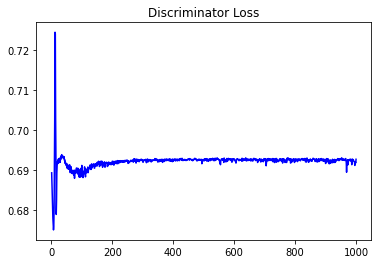

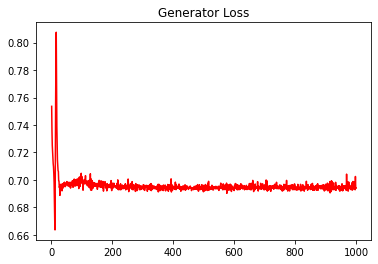

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07944367231667199


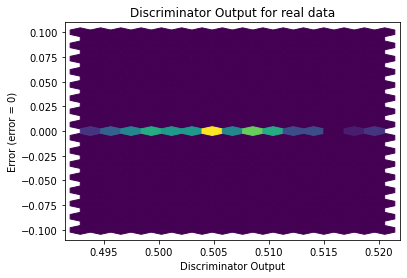

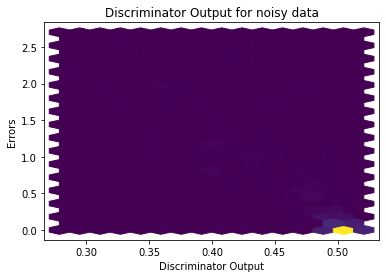

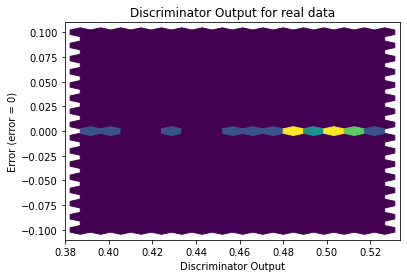

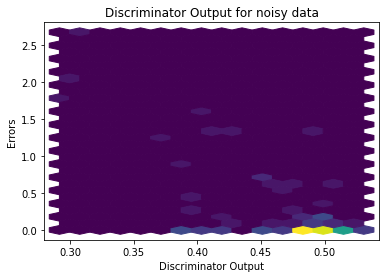

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


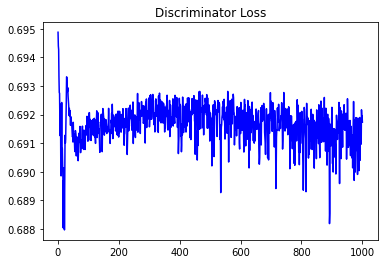

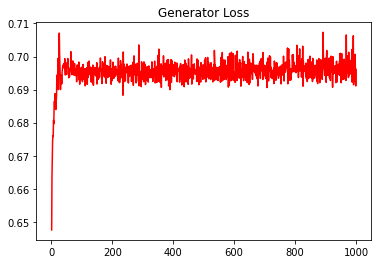

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05016147409661013


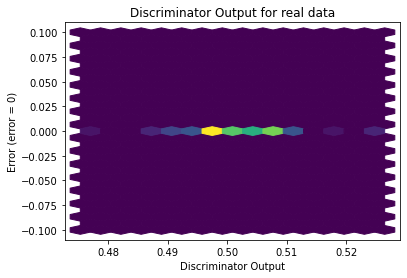

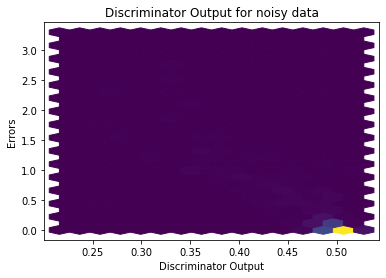

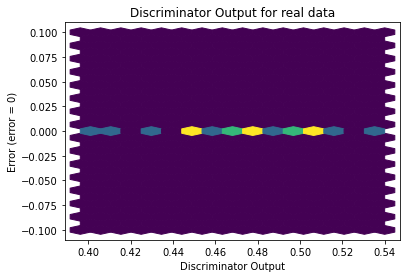

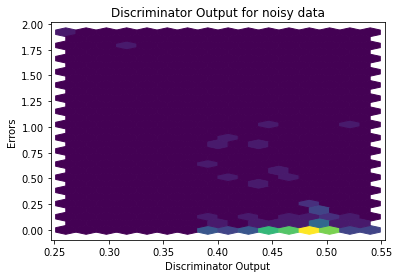

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5417]], requires_grad=True)
